In [73]:
#Importing the necessary liberaries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#Reading the file
df = pd.read_csv('/Users/khamaleshramesh/Downloads/ML Project/CAR DETAILS FROM CAR DEKHO.csv')

In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [79]:
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


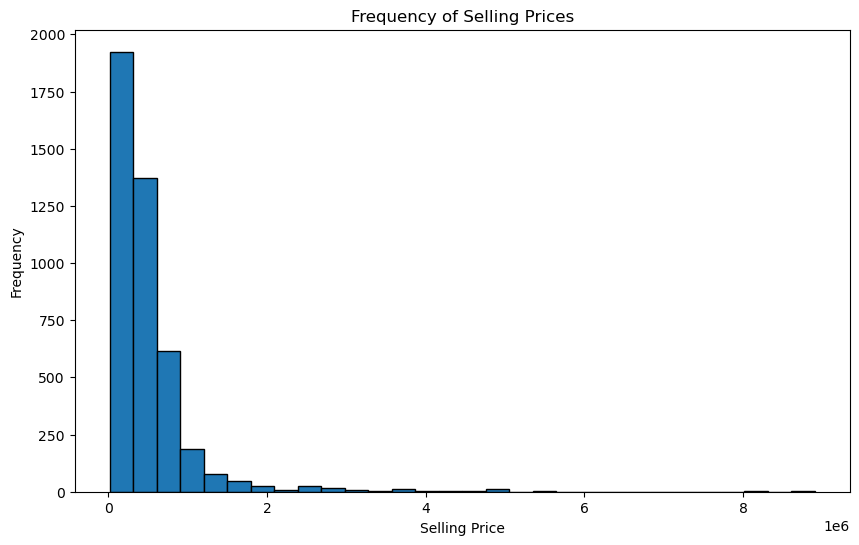

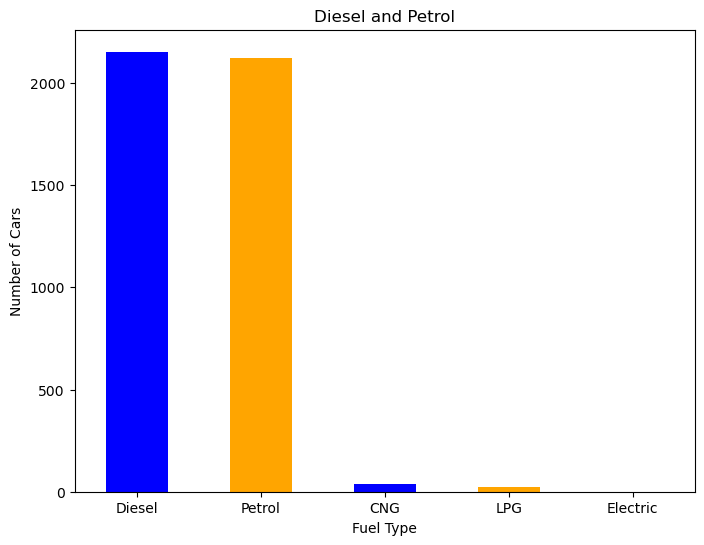

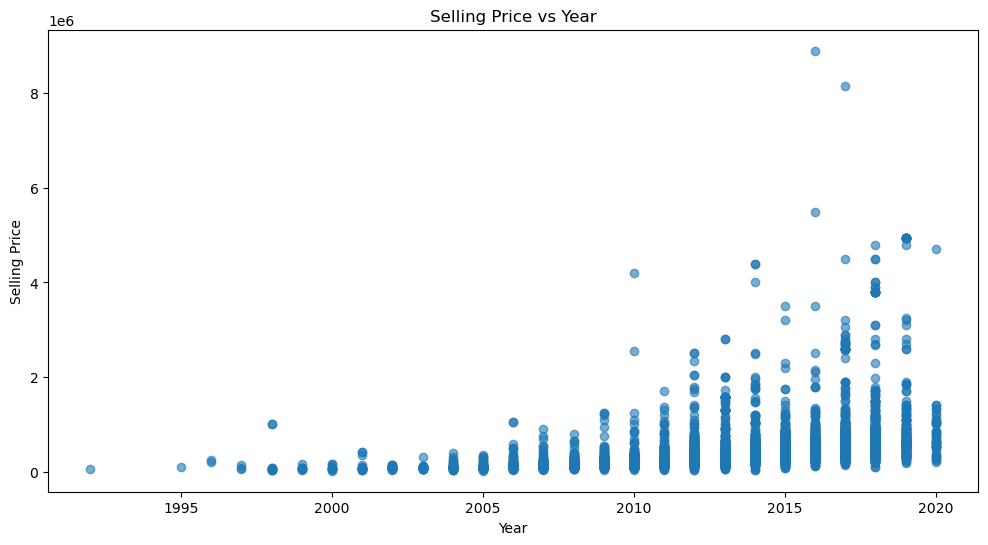

In [81]:
# Plots for better understanding
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=30, edgecolor='k')
plt.title('Frequency of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
df['fuel'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Diesel and Petrol')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.show()

# Visualization: Selling price vs year
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [83]:
#Cheching the distribution
print("Distribution of fuels:")
print(df['fuel'].value_counts())

Distribution of fuels:
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [85]:
#checking the duplicates
df = df[~df['fuel'].isin(['CNG', 'LPG','Electric'])]
df.duplicated()
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [87]:
#Count of Diesel and Petrol
print("Count of Diesel and Petrol:")
print(df['fuel'].value_counts())

Count of Diesel and Petrol:
fuel
Diesel    2153
Petrol    2123
Name: count, dtype: int64


In [89]:
#Converting the numeric to categorical 
transmission_dummies = pd.get_dummies(df['transmission'], prefix='transmission', drop_first=True)
df = pd.concat([df, transmission_dummies], axis=1)
df.drop('transmission', axis=1, inplace=True)

In [91]:
le = LabelEncoder()
df['transmission_Manual'] = le.fit_transform(df['transmission_Manual'])

In [93]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,owner,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner,1
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,First Owner,1
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,First Owner,1
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Second Owner,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,First Owner,1
10,Chevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,First Owner,1


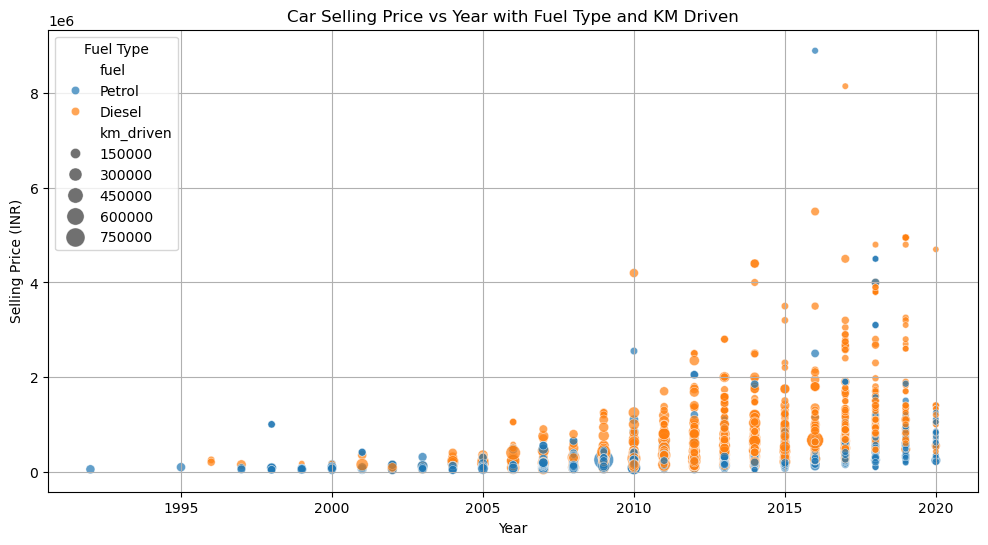

In [95]:
#Ploting for better understanding
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel', size='km_driven', sizes=(20, 200), alpha=0.7)
plt.title('Car Selling Price vs Year with Fuel Type and KM Driven')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

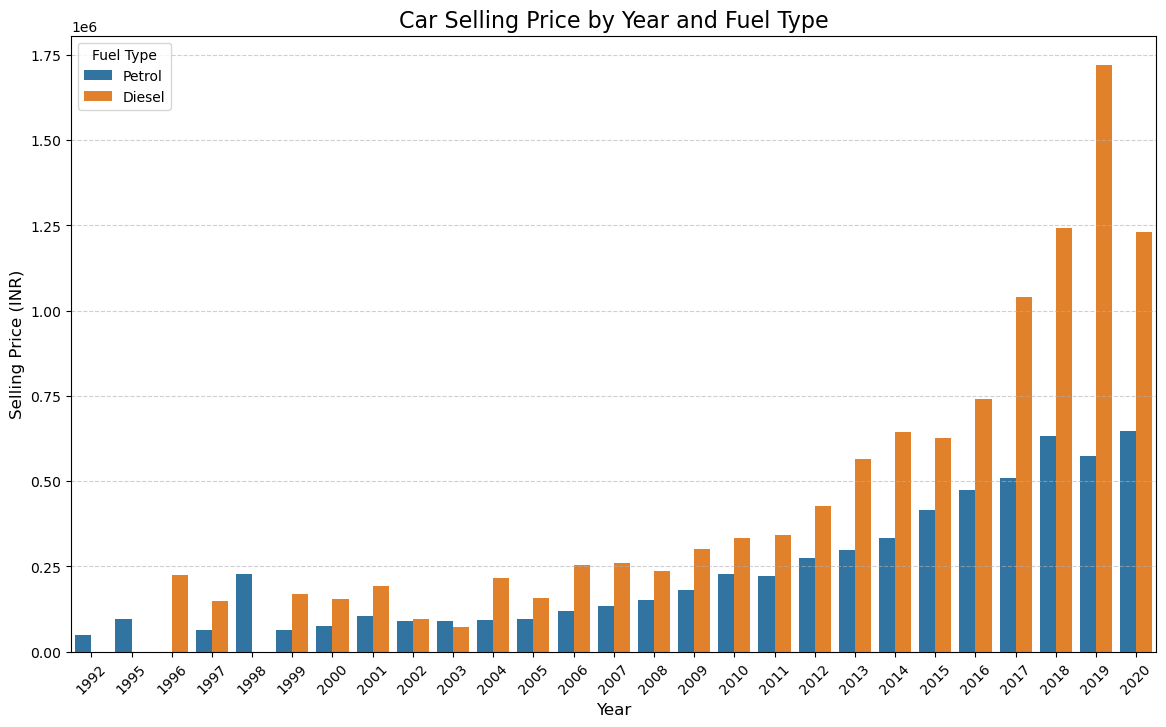

In [97]:
avg_price = df.groupby(['year', 'fuel'])['selling_price'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price,x='year',y='selling_price',hue='fuel',errorbar=None )

plt.title('Car Selling Price by Year and Fuel Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price (INR)', fontsize=12)
plt.legend(title='Fuel Type', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [99]:
#Train and Test split
X = df[['year', 'selling_price', 'km_driven', 'transmission_Manual']]
y = df['fuel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
#Scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
#Implementing the KNN
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
#predicting uisng test values
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[328  81]
 [ 98 349]]
Classification Report:
               precision    recall  f1-score   support

      Diesel       0.77      0.80      0.79       409
      Petrol       0.81      0.78      0.80       447

    accuracy                           0.79       856
   macro avg       0.79      0.79      0.79       856
weighted avg       0.79      0.79      0.79       856

Accuracy: 0.7908878504672897


In [107]:
#Hyperparameter
para_grid = {'n_neighbors': range(1, 27), 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), para_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 27), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [108]:
#Best scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters of Grid Search: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Parameters of Grid Search: {'n_neighbors': 24, 'p': 2, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.83


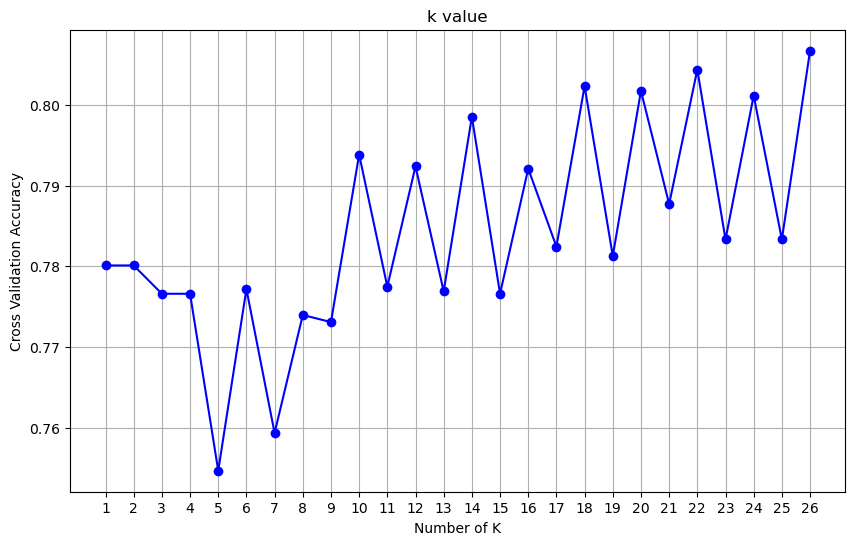

In [109]:
#Plot for the K value
k_values = range(1, 27)
k_scores = grid_search.cv_results_['mean_test_score'][:len(k_values)] 
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, marker='o', linestyle='-', color='b')
plt.title('k value')
plt.xlabel('Number of K')
plt.ylabel('Cross Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [110]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


In [115]:
#results after the hyperparameter tunning
confmatrix = confusion_matrix(y_test, y_pred)
classreport = classification_report(y_test, y_pred)
testaccuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", confmatrix)
print("Classification Report:\n", classreport)
print("Test Accuracy:\n", testaccuracy)

Confusion Matrix:
 [[342  67]
 [ 71 376]]
Classification Report:
               precision    recall  f1-score   support

      Diesel       0.83      0.84      0.83       409
      Petrol       0.85      0.84      0.84       447

    accuracy                           0.84       856
   macro avg       0.84      0.84      0.84       856
weighted avg       0.84      0.84      0.84       856

Test Accuracy:
 0.8387850467289719
